<a href="https://colab.research.google.com/github/miguelmota2301/ciencia_de_dados/blob/main/Pr%C3%A1tica_3_Visualiza%C3%A7%C3%A3o_e_Regress%C3%A3o_07_05_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Miguel Feliciano Mota Alves

# Gráficos

A visualização de dados é a arte de transformar dados em gráficos, tabelas e diagramas, que possam ser mais facilmente entendidos pelas pessoas.

A construção de gráficos em Python é feita principalmente pela utilização de 2 bibliotecas: **Matplotlib.pyplot** e **Seaborn**.

A mais conhecida - sem dúvidas - é a matplotlib.pyplot e é a que vamos discutir primeiro.



No matplotlib, os componentes de um gráfico são bem definidos:

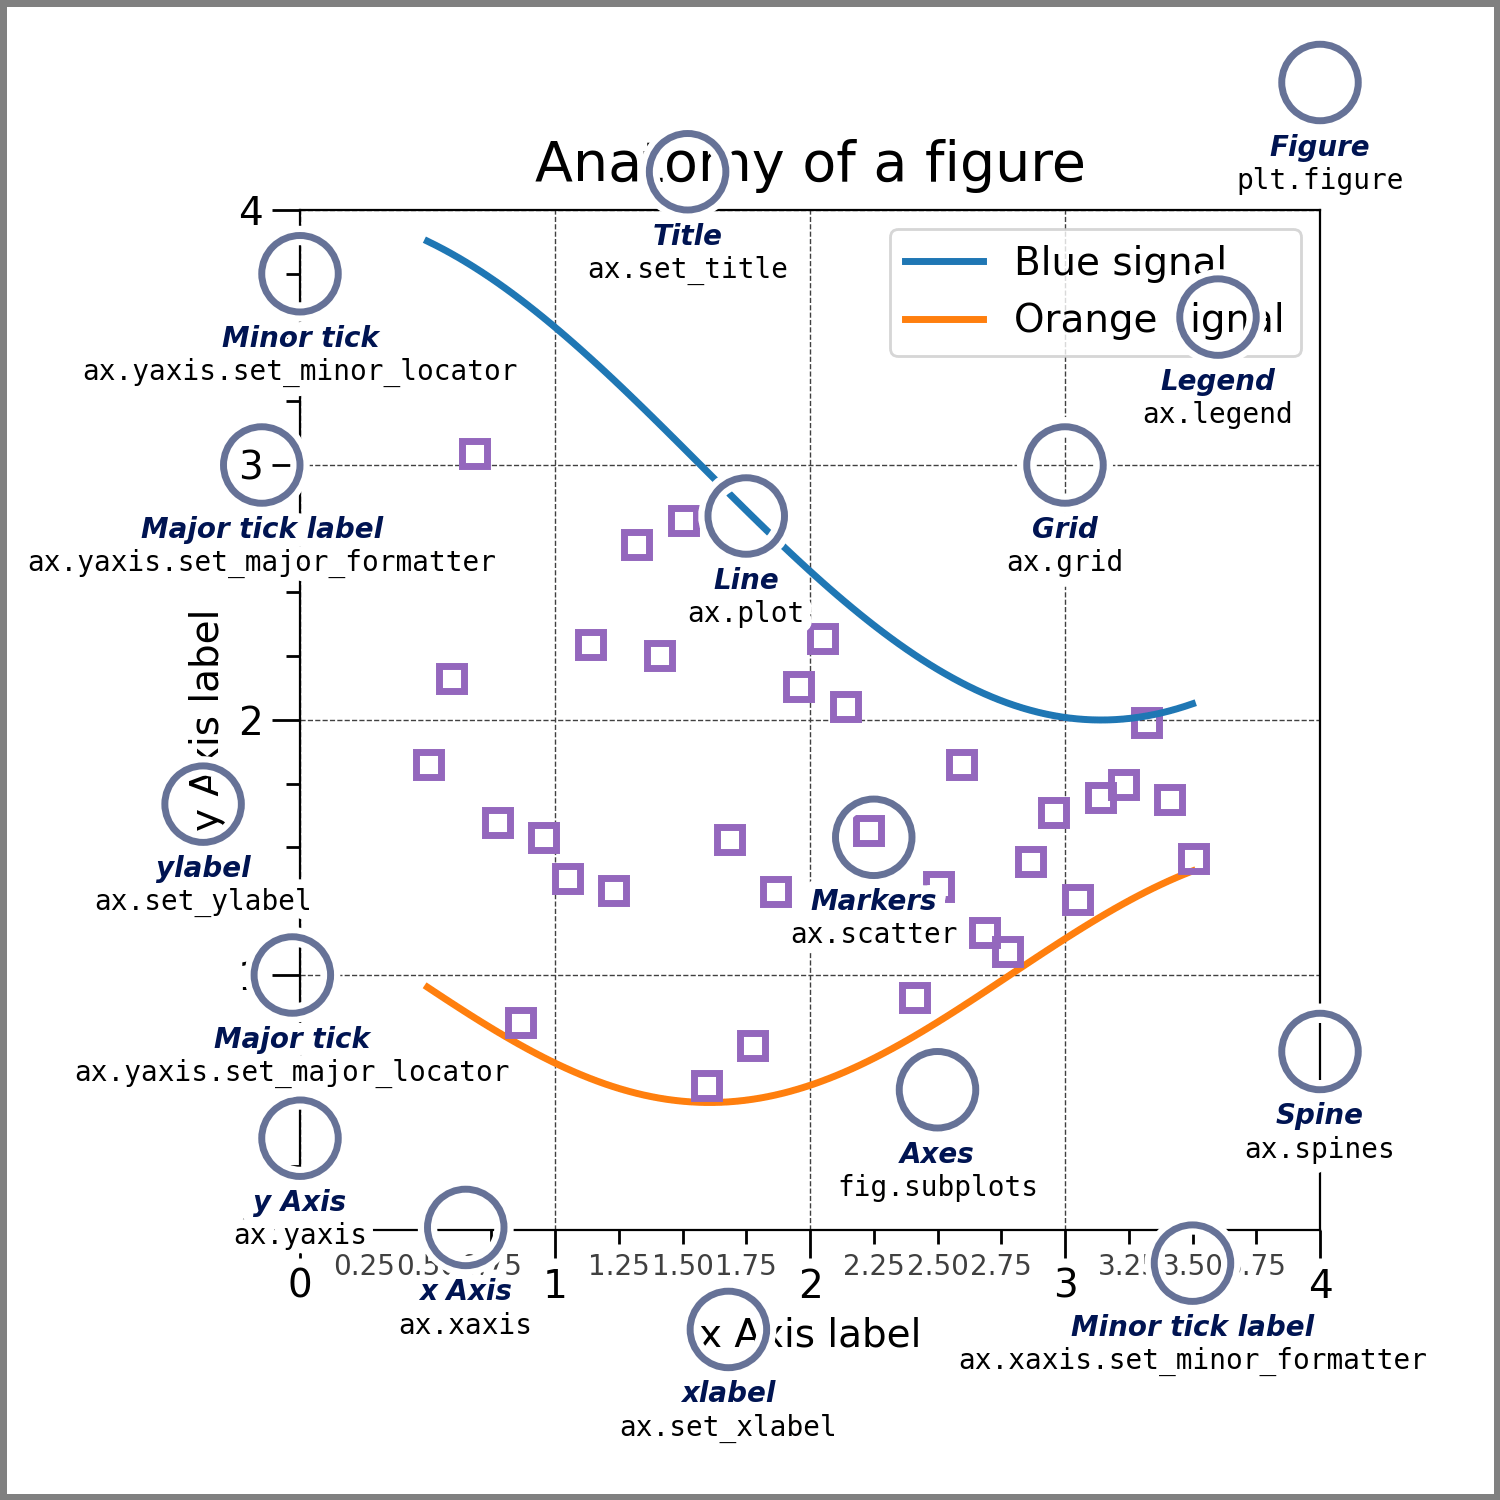

Figura retirada do próprio [tutorial](https://matplotlib.org/stable/users/explain/quick_start.html) do matplotlib

## Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

Para o conjunto de dados, iremos explorar o quiçá mais famoso dataset: Iris Dataset

Para tanto, iremos precisar de outra biblioteca: **scikit-learn**.

O scikit-learn é a principal biblioteca que utilizamos para aplicar as técnicas de machine learning.

In [ ]:
# Importar o comando datasets da biblioteca sklearn
from sklearn import datasets

# Carregar o dataset iris
iris = datasets.load_iris()

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# Transformando em um dataframe
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

# Concatenando a variável resposta ao dataframe
df["target"] = iris.target

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Na prática passada, mostrei o uso de `.loc` do pandas, o qual acessava a célula de um DataFrame conforme o valor da célula. O `.iloc`, por sua vez, acessa a célula de acordo com a posição dela.

Documentação: [iloc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html)

In [ ]:
df.iloc[0,4]

0

In [ ]:
df["nome_iris"] = 0

for i in range(len(df)):
  if df["target"].iloc[i] == 0:
    df["nome_iris"].iloc[i] = "setosa"

  elif df["target"].iloc[i] == 1:
    df["nome_iris"].iloc[i] = "versicolour"

  else:
    df["nome_iris"].iloc[i] = "virginica"

df

<ipython-input-7-d6496a58edd3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nome_iris"].iloc[i] = "setosa"


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,nome_iris
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## Construção de Gráficos



No `matplotlib`, gráficos são desenhados em espaços ou telas denominadas figuras. Uma figura pode conter vários eixos (axes), que são usados para desenhar gráficos específicos, além de subfiguras.

Os elementos de um gráfico são denominados artistas (Artists). Eles incluem as figuras e eixos em si, textos, símbolos, etc.

O processo de criação de gráficos se dá da seguinte forma:

1.    definição da figura;
2.    definição de um ou mais eixos;
3.    definição do gráfico a ser desenhado num dado conjunto de eixos;
4.    plotagem de cada gráfico a partir do conjunto de dados correspondente; e
5.    exibição dos gráficos



O site [Data-to-Viz](https://www.data-to-viz.com/) auxilia bastante na escolha dos gráficos.

### Figura e Eixos

Para definir a figura, podemos fazer de duas maneiras principais:


```
fig = plt.figure()
```
ou
```
fig, ax = plt.subplots()
```

Perceba que, na primeira forma, nós só definimos a figura, enquanto na segunda maneira definimos a figura e os eixos simultaneamente.

Para definir os eixos, pode-se usar o `plt.subplots()` ou:

```
fig = plt.figure()
ax = fig.add_subplot()
```

Como os eixos dependem da figura, não se consegue contruir os axes sem a figure.

In [ ]:
fig = plt.figure(figsize = (10,6))

<Figure size 1000x600 with 0 Axes>

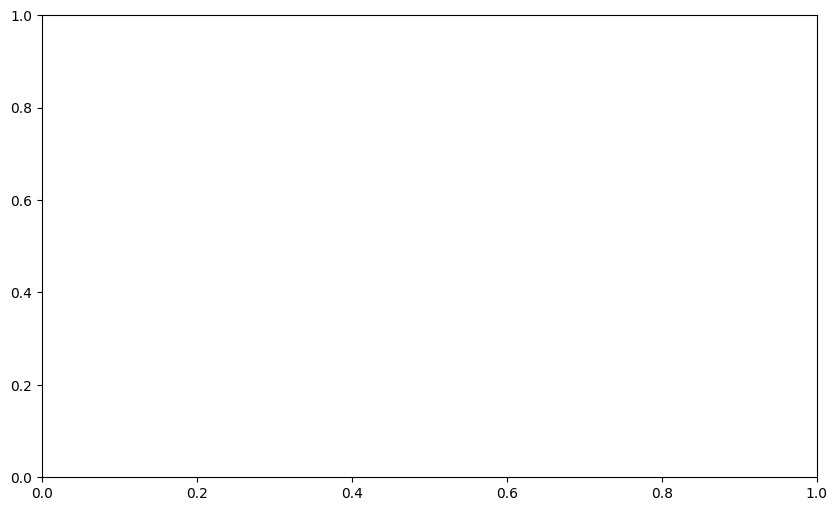

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

Com `plt.subplots()`, pode-se definir mais de um plot na mesma figura:

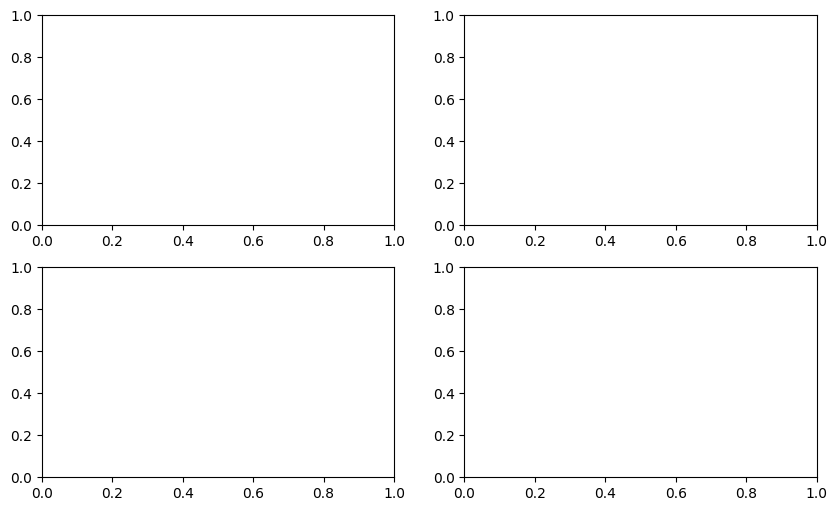

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (10, 6))

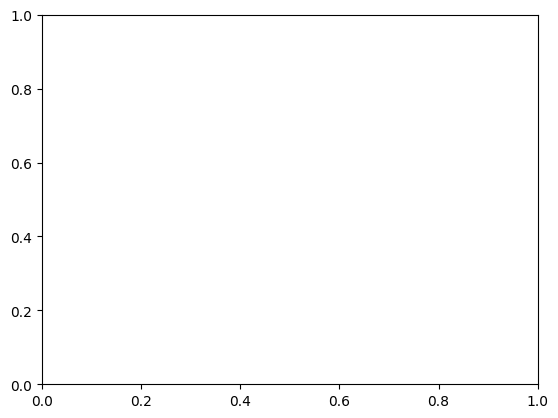

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

### Plot

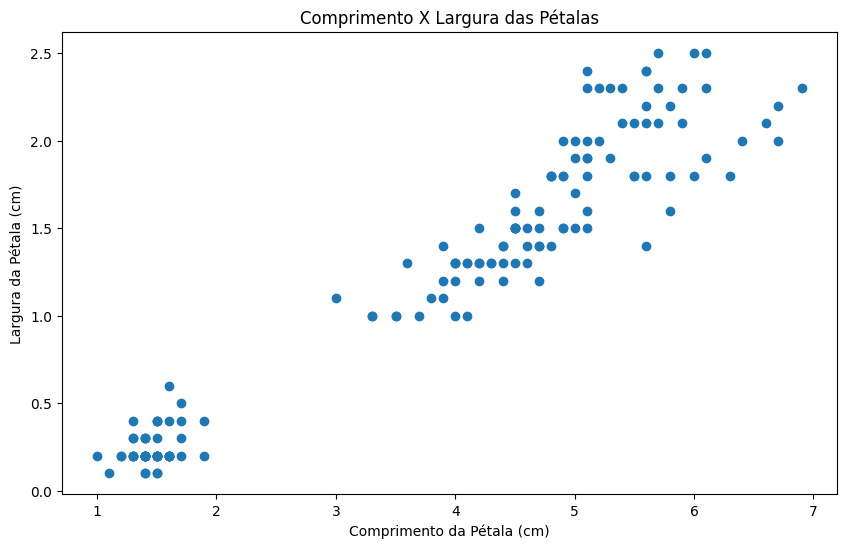

In [ ]:
# Definindo a figura e eixos
fig, ax = plt.subplots(figsize = (10,6))

# Definindo o título do gráfico
ax.set_title("Comprimento X Largura das Pétalas")

# Definindo o nome do eixo das abscissas
ax.set_xlabel("Comprimento da Pétala (cm)")

# Definindo o nome do eixo das ordenadas
ax.set_ylabel("Largura da Pétala (cm)")

# Definindo o plot: o tipo do gráfico
ax.scatter(x = df['petal length (cm)'], y = df['petal width (cm)'])

# Mostrando o gráfico
plt.show()

## Seaborn

Da mesma forma que o matplotlib, o seaborn tem a proposta de produzir gráficos.

Qual a vantagem do seaborn: produz gráficos mais bonitos (na minha opinião😀) e, em alguns momentos, tem um entendimento e usabilidade mais fácil.

[Seaborn](https://seaborn.pydata.org/tutorial/introduction.html)

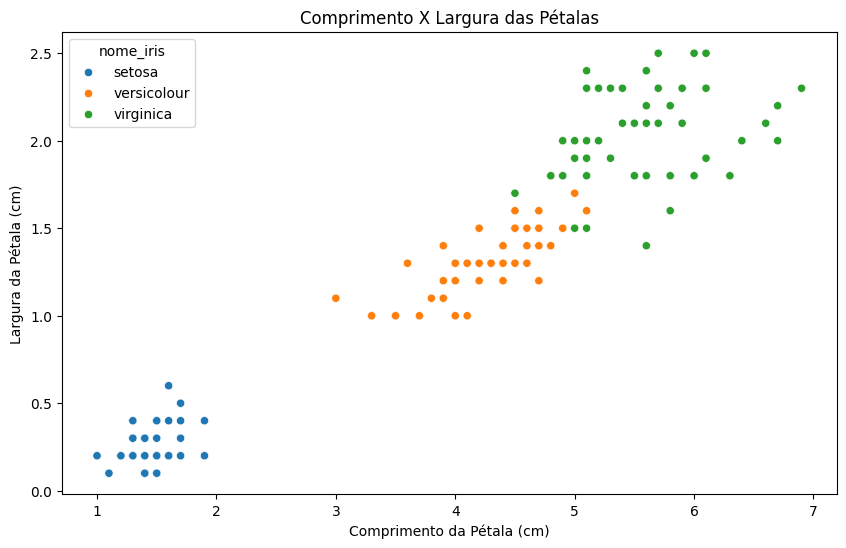

In [ ]:
# Definindo a figura e eixos
fig, ax = plt.subplots(figsize = (10,6))

# Definindo o título do gráfico
ax.set_title("Comprimento X Largura das Pétalas")

# Definindo o nome do eixo das abscissas
ax.set_xlabel("Comprimento da Pétala (cm)")

# Definindo o nome do eixo das ordenadas
ax.set_ylabel("Largura da Pétala (cm)")

# Definindo o plot: o tipo do gráfico
sns.scatterplot(x = df['petal length (cm)'], y = df['petal width (cm)'], hue = df['nome_iris'])

# Mostrando o gráfico
plt.show()

A biblioteca `pandas` também possui alguns gráficos nativamente.

Histograma usando o `pandas`:

<Axes: >

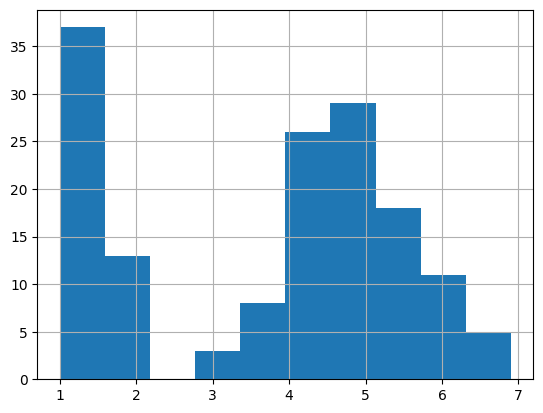

In [ ]:
df['petal length (cm)'].hist()

Histograma usando o `matplotlib`:

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

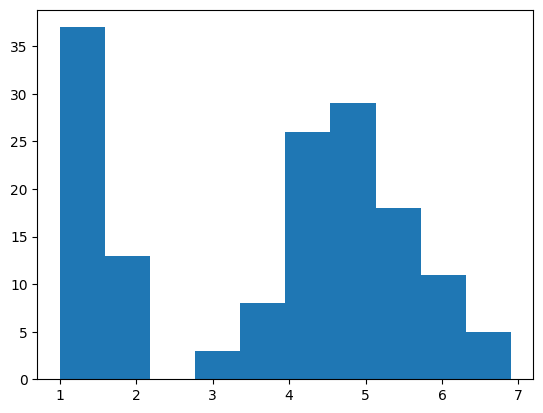

In [ ]:
plt.hist(x = df['petal length (cm)'])

Histograma usando o `seaborn`:

<Axes: xlabel='petal length (cm)', ylabel='Count'>

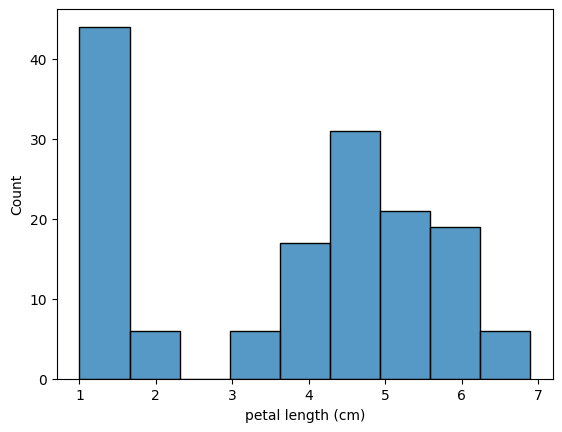

In [ ]:
sns.histplot(data = df['petal length (cm)'])

# Regressão Linear

Para o uso de método de aprendizado de máquina, existem algumas bibliotecas, tais como scikit-learn, scipy, tensorflow, statmodels, entre outras.

Para este curso, focaremos no scikit-learn, a mais famosa.

Documentação: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

## Importando bibliotecas

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

## Dataset

Vamos utilizar o banco de dados de [Volleyball](https://docs.google.com/spreadsheets/d/1bmr8k5C7juVLMOqA0K43gYHLol0AB3Ar/edit#gid=1094228426).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
volei = pd.read_excel("/content/drive/MyDrive/Cópia de 2019volleyball.xlsx")
volei.head()

,Nome,Ranking Geral,Ranking em 2020,Nacionalidade,Posição,Data de Nascimento,Altura (cm),Peso (kg),Salto (cm),Bloqueio (cm),Mão Dominante,Pontos do país,Pontos
0,Ting Zhu,3,23,China,Outside Hitter,1994-11-29,198,78,327,305,Right,320.0,1190.0
1,Macris Carneiro,176,19,Brazil,Setter,1989-03-03,178,68,292,285,NaN,220.0,833.0
2,Gabriela GuimarÃ£es,31,13,Brazil,Outside Hitter,1994-05-19,180,65,305,289,Right,220.0,788.0
3,Tijana BoÅ¡koviÄ,28,3,Serbia,Opposite,1997-03-08,194,84,329,310,Left,252.0,630.5
4,Paola Egonu,134,2,Italy,Opposite,1998-12-18,190,70,336,315,Right,165.0,597.0


In [ ]:
# Diz quantas observações e quantas variáveis
volei.shape

(30, 13)

In [ ]:
# Tipos das variáveis
volei.dtypes

Nome                   object
Ranking Geral           int64
Ranking em 2020         int64
Nacionalidade          object
Posição                object
Data de Nascimento     object
Altura (cm)             int64
Peso (kg)               int64
Salto (cm)              int64
Bloqueio (cm)           int64
Mão Dominante          object
Pontos do país        float64
Pontos                float64
dtype: object

## Correlação

In [ ]:
volei.columns

Index(['Nome', 'Ranking Geral', 'Ranking em 2020', 'Nacionalidade', 'Posição',
       'Data de Nascimento', 'Altura (cm)', 'Peso (kg)', 'Salto (cm)',
       'Bloqueio (cm)', 'Mão Dominante', 'Pontos do país', 'Pontos'],
      dtype='object')

In [ ]:
volei_num = volei[['Ranking Geral', 'Ranking em 2020', 'Altura (cm)', 'Peso (kg)', 'Salto (cm)',
       'Bloqueio (cm)', 'Pontos do país', 'Pontos']]

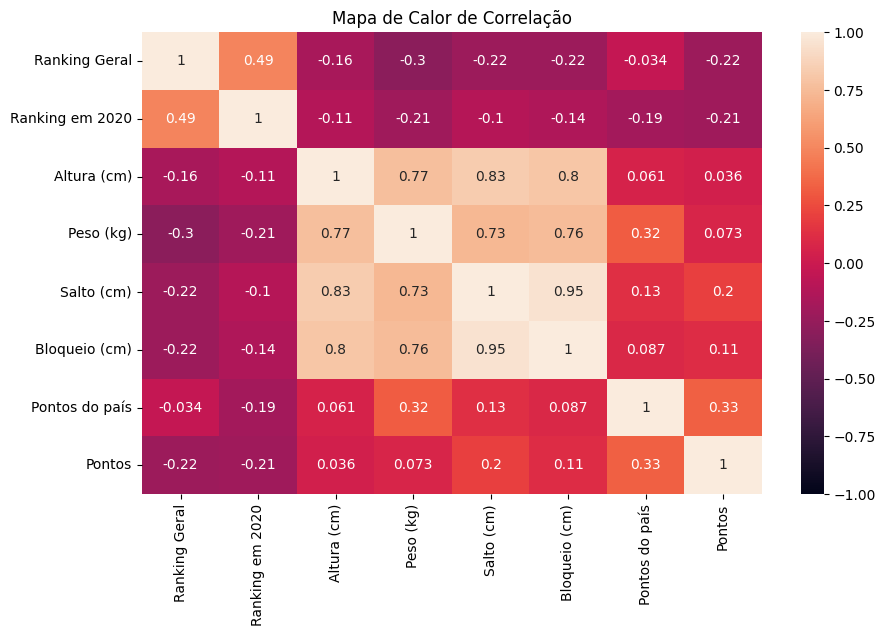

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.set_title("Mapa de Calor de Correlação")

sns.heatmap(volei_num.corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

## Modelo - R. L. Simples

Em um primeiro momento, desejamos selecionar as variáveis preditas e preditoras.

In [ ]:
X = volei['Peso (kg)']
y = volei['Altura (cm)']

print(f"Formato de X:{X.shape}")
print(f"Formato de y:{y.shape}")

Formato de X:(30,)
Formato de y:(30,)


Perceba que o *shape* de X e y está "estranho". De fato, dessa forma o código não iria rodar, pois X e y tem 30 observações e "nenhuma coluna".

Para consertar isso, usamos o `nome_qualquer.values.reshape()`.

Note que isso acontece apenas quando escolhemos um subset de apenas uma variável:

In [ ]:
Xds = volei[['Altura (cm)', 'Peso (kg)']]
Xds.shape

(30, 2)

In [ ]:
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

In [ ]:
print(X.shape, y.shape)

(30, 1) (30, 1)


Utilizando `train_test_split`, dividiremos o dataset de treino e de teste

`random_state` sempre defina esse argumento na divisão do dataset e no modelo (quando tiver randomização no modelo).

```
random_state = 1
```
e

```
random_state = 23
```

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 23)

Na célula de baixo que o ajuste ocorre.

In [ ]:
# Dando um "apelido" para o método
linear = LinearRegression()

# Ajuste do modelo com X de treinamento e y de treinamento
linear.fit(x_train, y_train)

# Predição de y dado x de teste
y_pred = linear.predict(x_test)

In [ ]:
print(f"Coeficiente Angular: {linear.coef_[0,0]}\nCoeficiente Linear: {linear.intercept_[0]}")

Coeficiente Angular: 0.8429958027282267
Coeficiente Linear: 127.03825638335081


### Métricas de Avaliação

In [ ]:
r2 = r2_score(y_true = y_test, y_pred = y_pred)
mse = mean_squared_error(y_true = y_test, y_pred = y_pred)
mae = mean_absolute_error(y_true = y_test, y_pred = y_pred)

print(f"R²: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

R²: 0.6530058797730779
MSE: 26.200198016146366
MAE: 4.841883331390148


### Gráficos

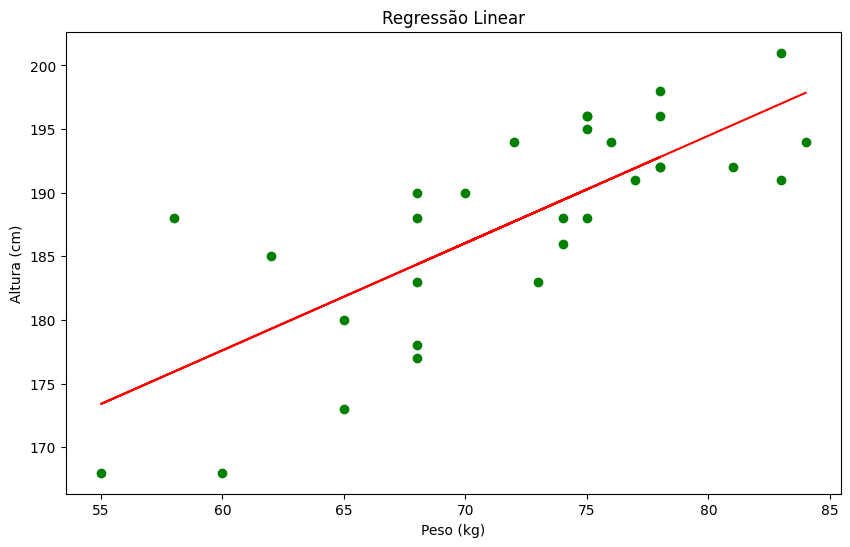

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.set_title("Regressão Linear")

ax.set_xlabel("Peso (kg)")

ax.set_ylabel("Altura (cm)")

plt.scatter(X, y, color = "g")

# Reta da regressão
plt.plot(x_test, y_pred, color = "r")

plt.show()

## R. L. Múltipla

### Definição de X e y

In [ ]:
Xm = volei[['Peso (kg)', 'Altura (cm)', 'Salto (cm)']]
ym = volei['Bloqueio (cm)']

print(Xm.shape, ym.shape)

(30, 3) (30,)


In [ ]:
ym = ym.values.reshape(-1, 1)

In [ ]:
print(Xm.shape, ym.shape)

(30, 3) (30, 1)


### Divisão de treino e teste

In [ ]:
xm_train, xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.3, random_state= 23)

### Modelo

In [ ]:
# Dando um "apelido" para o método
mlinear = LinearRegression()

# Ajuste do modelo com X de treinamento e y de treinamento
mlinear.fit(xm_train, ym_train)

# Predição de y dado x de teste
ym_pred = mlinear.predict(xm_test)

### Coeficientes da Regressão Linear Múltipla

In [ ]:
mlinear.coef_

array([[ 0.32321503, -0.27950851,  0.97507112]])

In [ ]:
print(f"β0:\t{mlinear.intercept_[0]}")
for i in range(len(mlinear.coef_[0])):
  print(f"β{i+1}:\t{mlinear.coef_[0][i]}")

β0:	26.075657395997666
β1:	0.32321502663230917
β2:	-0.27950850806010946
β3:	0.9750711240739077


### Métricas de Avaliação

In [ ]:
r2 = r2_score(y_true = y_test, y_pred = y_pred)
mse = mean_squared_error(y_true = y_test, y_pred = y_pred)
mae = mean_absolute_error(y_true = y_test, y_pred = y_pred)

print(f"R²: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

R²: 0.8721310076561226
MSE: 54.86369086319893
MAE: 6.405780999733088


A função `LinearRegression()` possui o parâmetro `.score()` que dá o R² do modelo utilizando o conjunto de treinamento.

In [ ]:
mlinear.score(xm_train, ym_train)

0.9139735917728415

## Regressão Linear com StatsModels

`statsmodels` é uma biblioteca com técnicas de machine learning.

Muito utilizada para regressão linear por dar uma análise estatística mais completa que o `scikit-learn`.

In [ ]:
import statsmodels.api as sm

model = sm.OLS(ym_train, xm_train)
result = model.fit()

In [ ]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.212e+04
Date:                Tue, 07 May 2024   Prob (F-statistic):                    9.75e-34
Time:                        15:02:19   Log-Likelihood:                         -59.242
No. Observations:                  21   AIC:                                      124.5
Df Residuals:                      18   BIC:                                      127.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

# Referências - Gráficos

ALMEIDA, Marcos. Data Visualization: conhecendo as bibliotecas do Python. **Alura**, 2023. Disponível em [Data Visualization](https://www.alura.com.br/artigos/data-visualization-conhecendo-bibliotecas-python). Acesso em 6 mai. 2024.

MORENO, Valter. Aula 9 - Visualização de Dados. **Kaggle**, 2022. Disponível em [Visualização de Dados](https://www.kaggle.com/code/vmorenojr/aula-9-visualiza-o-de-dados). Acesso em 6 mai. 2024.

J. D. Hunter, "Matplotlib: A 2D Graphics Environment", **Computing in Science & Engineering**, vol. 9, no. 3, pp. 90-95, 2007.

Waskom, M. L., (2021). Seaborn: statistical data visualization. **Journal of Open Source Software**, 6(60), 3021, https://doi.org/10.21105/joss.03021.

# Referências - Regressão

AMORIM, Natália. Regressão Linear Simples com Python e sklearn. Dev4.0, 2021. Disponível em [Aula de Regressão Linear](https://dev4lab.github.io/posts/regressao-lienar-com-python/). Acesso em 06 mai. 2024.

PEDREGOSA, F; *et al*. Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, v.12, pp.2825-2830, 2011.